In [46]:
import pandas as pd

In [47]:
lawinen_set = pd.read_csv('newData/gesamt_set.csv', sep=',')

In [48]:
lawinen_set['ID'] = lawinen_set['ID'].fillna(0)
lawinen_set

,Datum,Intervall,Lawinengrad,Schneehöhe,Schneehöhe_Norm,Niederschlag,Lufttemperatur_7h,Lufttemperatur_7h_Norm,Lufttemperatur_7h_Gew,Lufttemperatur_14h,...,Neuschnee_Gew,Lawinenabgänge,ID,meanExpo,meanSlope,stdDevSlope,MinSlope,MaxSlope,Altitude,Avalanche
0,1989-12-20,1989/ 1990,0.0,20.0,29.371271,0.0,-1.4,-11.2,99999.0,2.6,...,99999.0,0.0,0.0,82.521374,39.486485,8.214154,14.862285,71.692138,1822.645769,0
1,1989-12-21,1989/ 1990,0.0,19.0,26.654976,0.0,3.9,31.2,-5.6,3.5,...,99999.0,0.0,0.0,82.016159,42.224050,6.966050,16.252000,66.352450,1961.442600,0
2,1989-12-22,1989/ 1990,0.0,19.0,27.313567,9.1,7.6,60.8,15.6,4.7,...,99999.0,0.0,0.0,68.013048,34.367700,3.891300,19.264000,41.614200,1879.884500,0
3,1989-12-23,1989/ 1990,0.0,4.0,5.611574,5.3,-6.0,-48.0,30.4,-7.6,...,20.0,0.0,0.0,264.471932,43.070671,8.680311,9.192779,69.469879,2887.147429,0
4,1989-12-24,1989/ 1990,0.0,10.0,13.894920,7.3,-5.1,-40.8,-24.0,-4.2,...,20.0,0.0,0.0,98.851562,41.040858,8.651008,6.873767,71.013708,2637.582267,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7016,2022-02-08,2021/ 2022,33.0,175.0,162.359178,16.0,-9.0,-72.0,-36.0,-1.0,...,100.0,1.0,33.0,62.004911,41.474100,8.876500,1.418093,65.950220,2223.063053,1
7017,2022-02-09,2021/ 2022,33.0,155.0,141.483293,8.0,4.0,32.0,-36.0,8.0,...,240.0,0.0,0.0,279.738227,39.635600,8.306790,5.107610,63.339610,3027.450950,0
7018,2022-02-10,2021/ 2022,33.0,149.0,134.537246,0.0,-1.0,-8.0,16.0,1.0,...,73.0,0.0,0.0,232.719192,37.897100,6.448350,12.266050,59.394250,2155.532950,0
7019,2022-02-11,2021/ 2022,22.0,144.0,129.792371,0.0,-2.0,-16.0,-4.0,-6.0,...,21.0,0.0,0.0,83.428097,39.152621,7.412260,7.983723,62.527311,2637.086851,0


<AxesSubplot:>

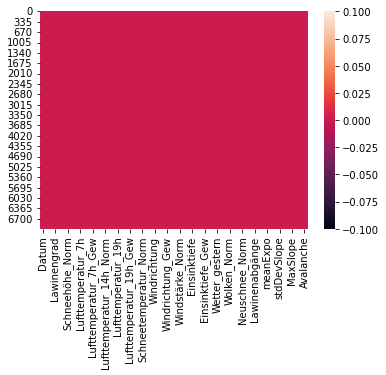

In [49]:
import seaborn as sns

sns.heatmap(lawinen_set.isna())

In [50]:
from sklearn import tree

lawinen_set = lawinen_set.drop(['Datum', 'Intervall' ], axis=1)

lawinen_set

,Lawinengrad,Schneehöhe,Schneehöhe_Norm,Niederschlag,Lufttemperatur_7h,Lufttemperatur_7h_Norm,Lufttemperatur_7h_Gew,Lufttemperatur_14h,Lufttemperatur_14h_Norm,Lufttemperatur_14h_Gew,...,Neuschnee_Gew,Lawinenabgänge,ID,meanExpo,meanSlope,stdDevSlope,MinSlope,MaxSlope,Altitude,Avalanche
0,0.0,20.0,29.371271,0.0,-1.4,-11.2,99999.0,2.6,20.8,99999.0,...,99999.0,0.0,0.0,82.521374,39.486485,8.214154,14.862285,71.692138,1822.645769,0
1,0.0,19.0,26.654976,0.0,3.9,31.2,-5.6,3.5,28.0,10.4,...,99999.0,0.0,0.0,82.016159,42.224050,6.966050,16.252000,66.352450,1961.442600,0
2,0.0,19.0,27.313567,9.1,7.6,60.8,15.6,4.7,37.6,14.0,...,99999.0,0.0,0.0,68.013048,34.367700,3.891300,19.264000,41.614200,1879.884500,0
3,0.0,4.0,5.611574,5.3,-6.0,-48.0,30.4,-7.6,-60.8,18.8,...,20.0,0.0,0.0,264.471932,43.070671,8.680311,9.192779,69.469879,2887.147429,0
4,0.0,10.0,13.894920,7.3,-5.1,-40.8,-24.0,-4.2,-33.6,-30.4,...,20.0,0.0,0.0,98.851562,41.040858,8.651008,6.873767,71.013708,2637.582267,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7016,33.0,175.0,162.359178,16.0,-9.0,-72.0,-36.0,-1.0,-8.0,-40.0,...,100.0,1.0,33.0,62.004911,41.474100,8.876500,1.418093,65.950220,2223.063053,1
7017,33.0,155.0,141.483293,8.0,4.0,32.0,-36.0,8.0,64.0,-4.0,...,240.0,0.0,0.0,279.738227,39.635600,8.306790,5.107610,63.339610,3027.450950,0
7018,33.0,149.0,134.537246,0.0,-1.0,-8.0,16.0,1.0,8.0,32.0,...,73.0,0.0,0.0,232.719192,37.897100,6.448350,12.266050,59.394250,2155.532950,0
7019,22.0,144.0,129.792371,0.0,-2.0,-16.0,-4.0,-6.0,-48.0,4.0,...,21.0,0.0,0.0,83.428097,39.152621,7.412260,7.983723,62.527311,2637.086851,0


<AxesSubplot:>

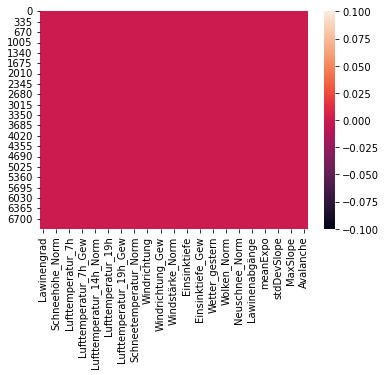

In [51]:
sns.heatmap(lawinen_set.isna())

In [52]:
#sns.pairplot(lawinen_set, hue="Avalanche",palette="bright")

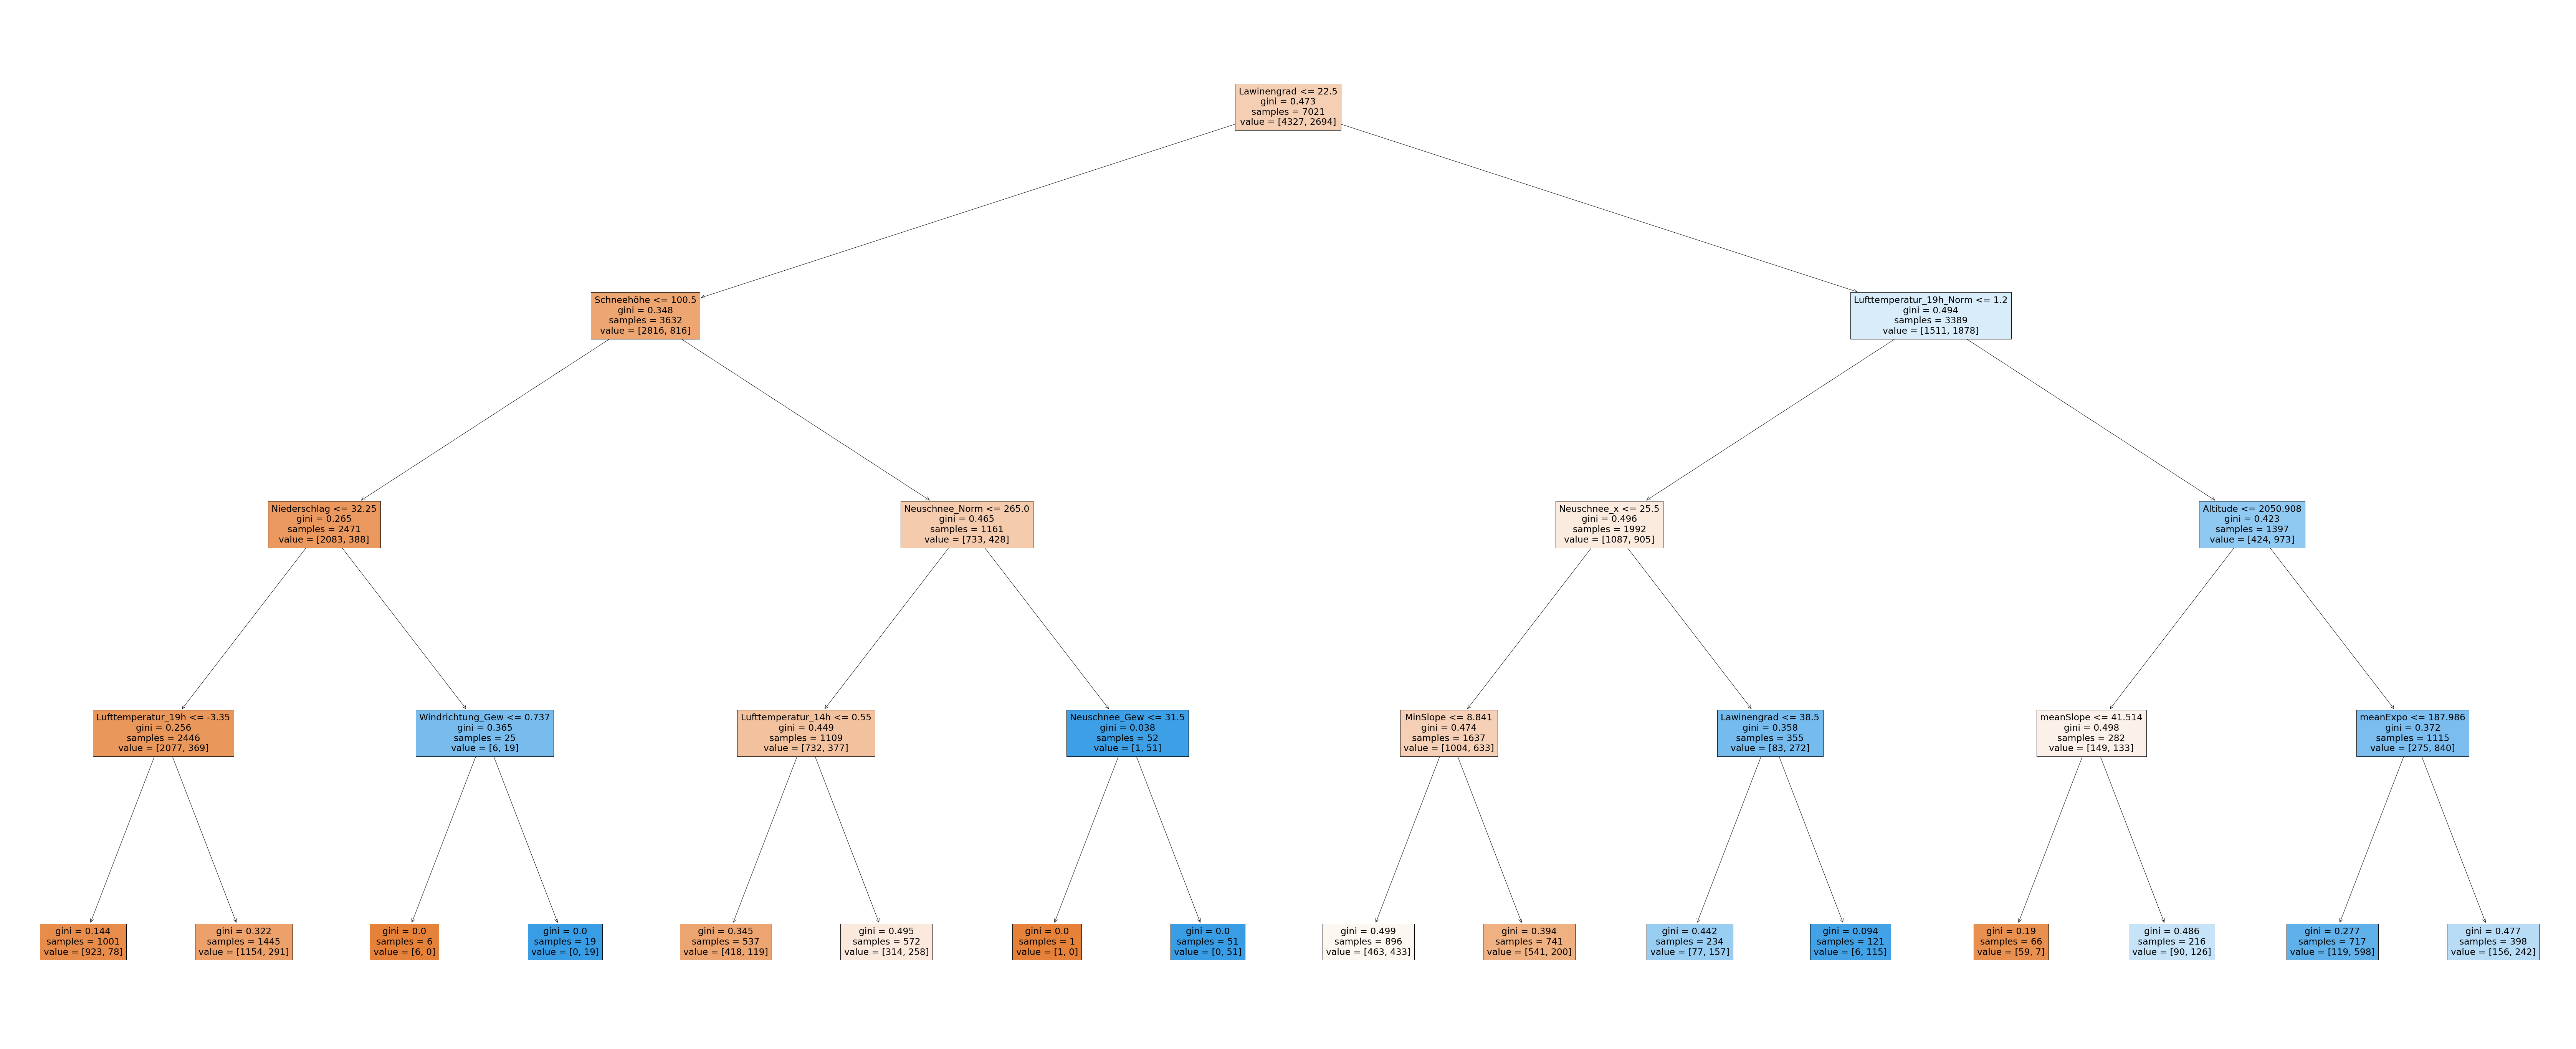

In [53]:
import copy
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

avalanche_set = copy.copy(lawinen_set)

avalanche_set = avalanche_set.drop([ 'Lawinenabgänge', 'ID' ], axis=1)
feature_names = avalanche_set.columns.drop('Avalanche')
X = avalanche_set[avalanche_set.columns.drop('Avalanche')]
y = avalanche_set['Avalanche']
dt = tree.DecisionTreeClassifier( max_depth=4)
dt.fit(X, y)


fig, ax = plt.subplots(figsize=(120, 50))
tree.plot_tree(dt, filled=True, ax=ax, feature_names=feature_names)
plt.show()

In [54]:
cross_val_score(dt, X, y, cv=5)

array([0.65551601, 0.75498575, 0.6980057 , 0.68732194, 0.67663818])

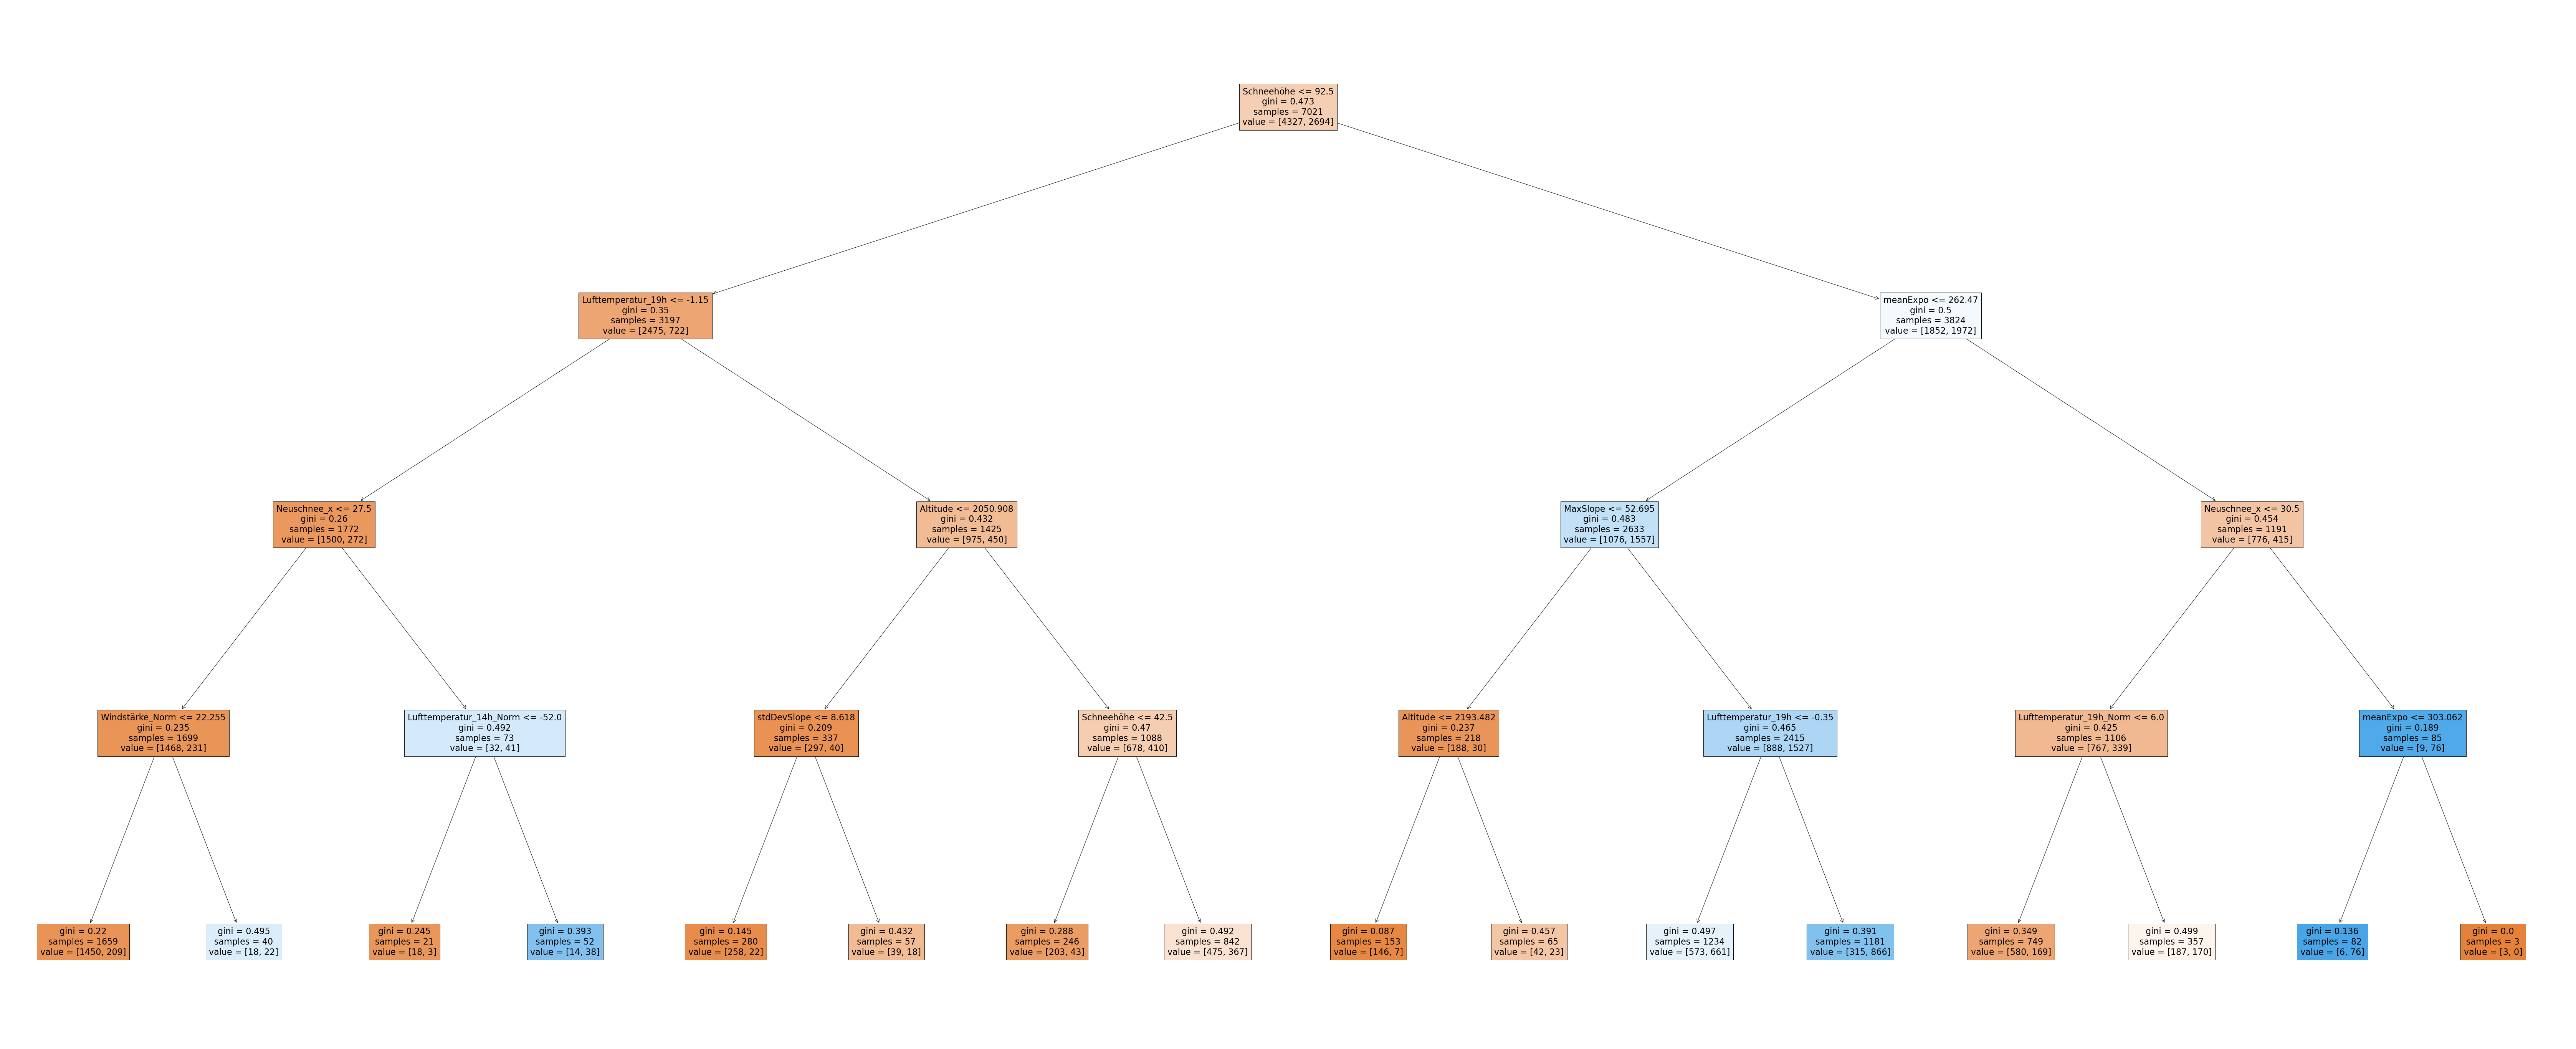

In [59]:
avalanche_set_noLawinengrad = avalanche_set.drop(['Lawinengrad',], axis=1)
feature_names = avalanche_set_noLawinengrad.columns.drop('Avalanche')
X_noLawinengrad = avalanche_set_noLawinengrad[avalanche_set_noLawinengrad.columns.drop('Avalanche')]
y_noLawinengrad = avalanche_set_noLawinengrad['Avalanche']
dt = tree.DecisionTreeClassifier( max_depth=4)
dt.fit(X_noLawinengrad, y_noLawinengrad)


fig, ax = plt.subplots(figsize=(120, 50))
tree.plot_tree(dt, filled=True, ax=ax, feature_names=feature_names)
plt.show()

In [56]:
cross_val_score(dt, X_noLawinengrad, y_noLawinengrad, cv=5)

array([0.65124555, 0.73219373, 0.63675214, 0.6980057 , 0.72863248])

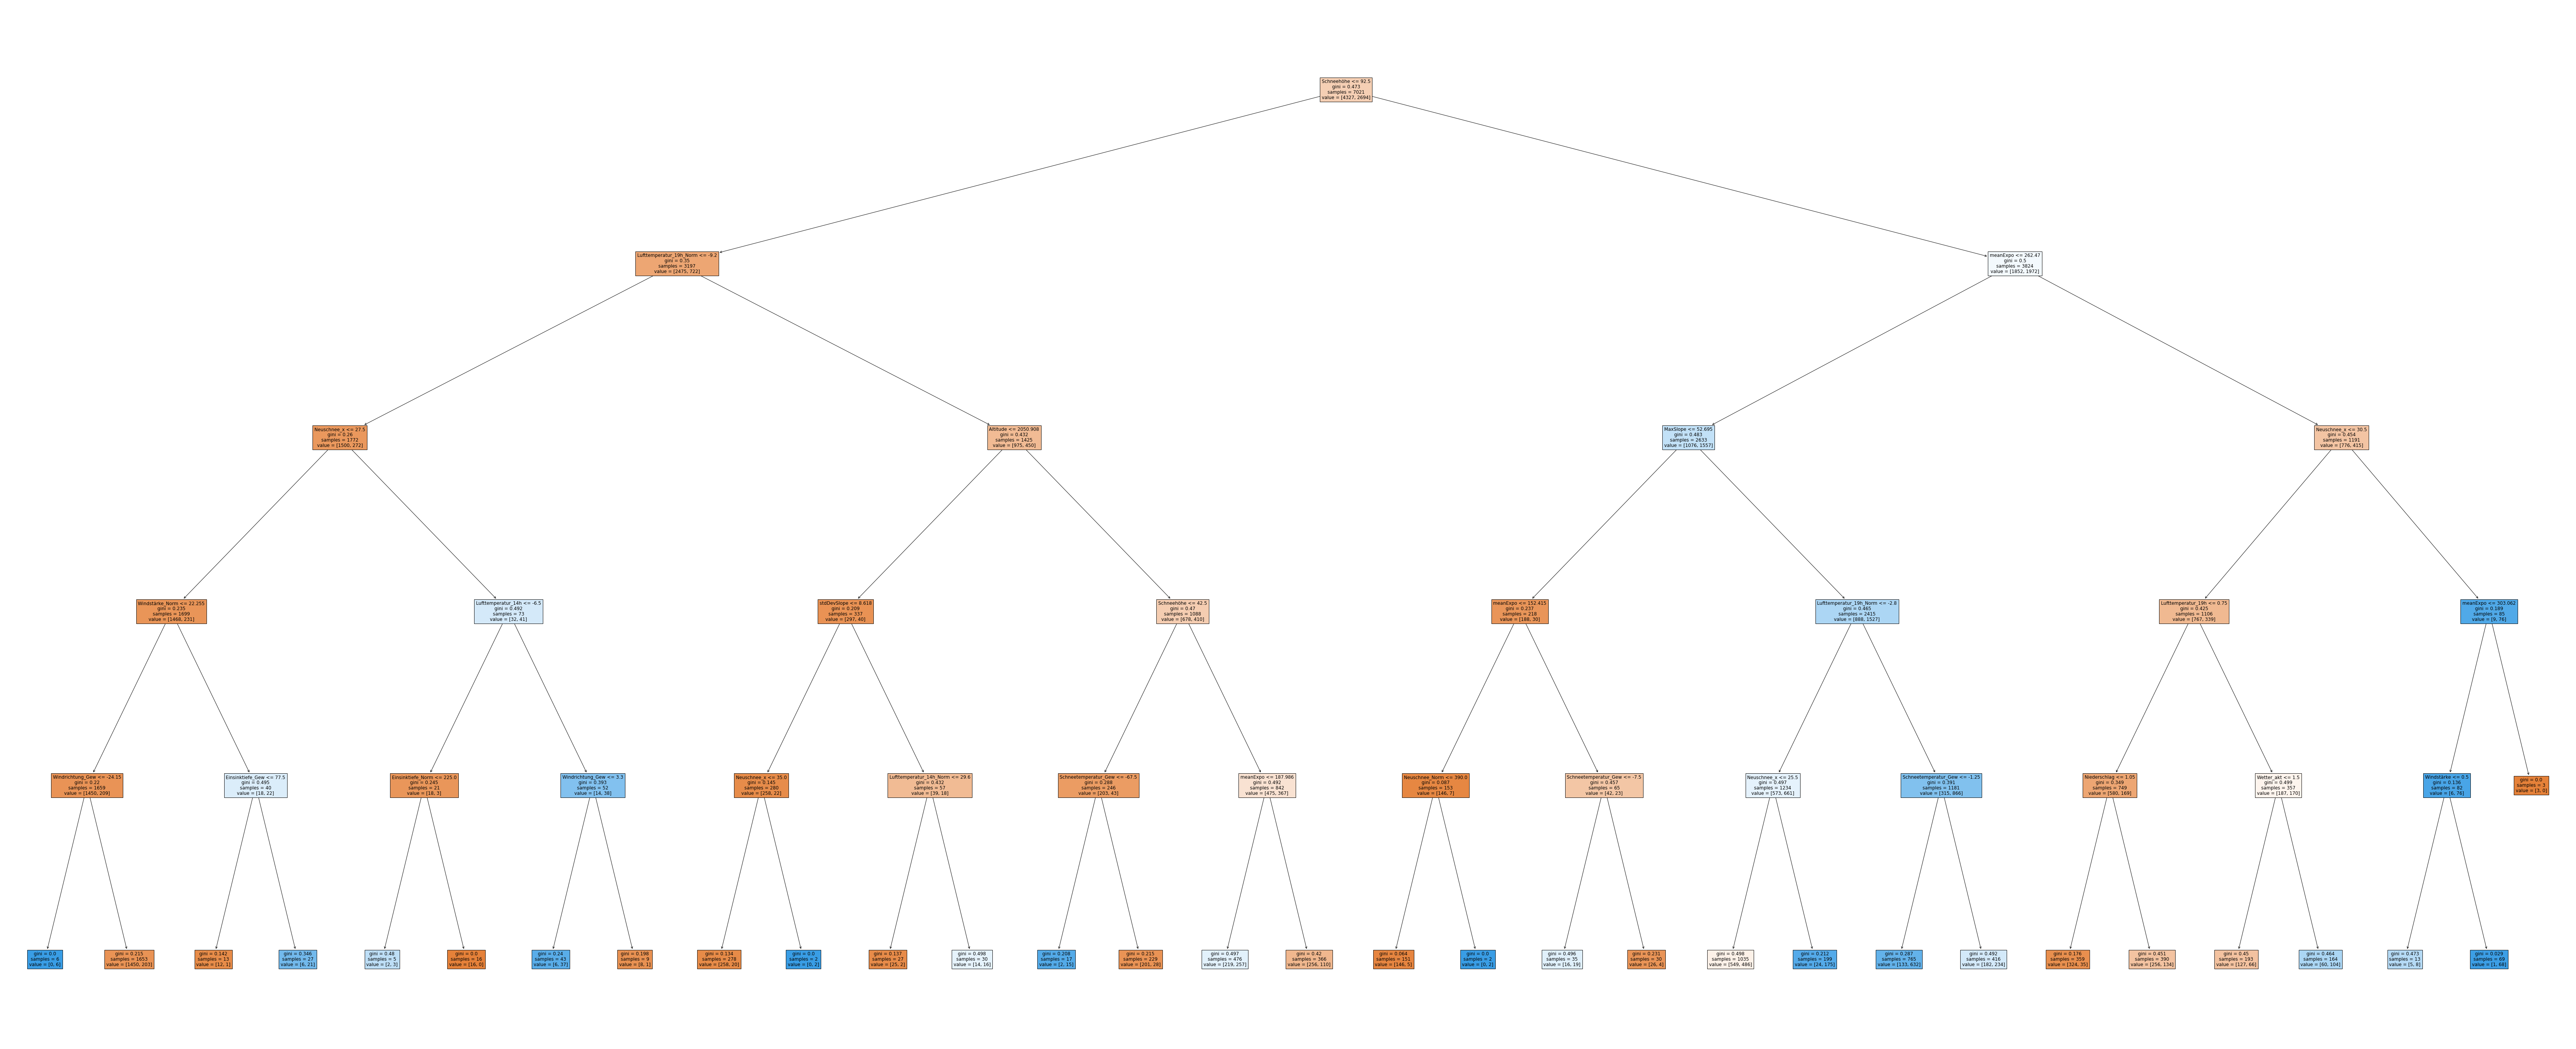

In [60]:
avalanche_set_noLawinengrad = avalanche_set.drop(['Lawinengrad',], axis=1)
feature_names = avalanche_set_noLawinengrad.columns.drop('Avalanche')
X_noLawinengrad = avalanche_set_noLawinengrad[avalanche_set_noLawinengrad.columns.drop('Avalanche')]
y_noLawinengrad = avalanche_set_noLawinengrad['Avalanche']
dt = tree.DecisionTreeClassifier( max_depth=5)
dt.fit(X_noLawinengrad, y_noLawinengrad)


fig, ax = plt.subplots(figsize=(120, 50))
tree.plot_tree(dt, filled=True, ax=ax, feature_names=feature_names)
plt.show()

In [57]:
from sklearn import svm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X_train , X_test , y_train, y_test = train_test_split(X, y, random_state=0)

clf = make_pipeline(StandardScaler(), svm.SVC())
#clf = svm.SVC()
clf.fit(X_train,y_train)

#gram_test = np.dot(X_test, X_train.T)
pred = clf.predict(X_test)

print(accuracy_score(y_test, pred), cross_val_score(clf, X, y, cv=5))

0.780751708428246 [0.73950178 0.75569801 0.70797721 0.74358974 0.75213675]


In [58]:

X_train , X_test , y_train, y_test = train_test_split(X_noLawinengrad, y_noLawinengrad, random_state=0)

clf = make_pipeline(StandardScaler(), svm.SVC())
#clf = svm.SVC()
clf.fit(X_train,y_train)

#gram_test = np.dot(X_test, X_train.T)
pred = clf.predict(X_test)

print(accuracy_score(y_test, pred), cross_val_score(clf, X, y, cv=5))

0.7693621867881549 [0.73950178 0.75569801 0.70797721 0.74358974 0.75213675]
